In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn import preprocessing, cross_validation, svm
import pickle
% matplotlib inline

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data', header=None, 
                 names=['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
                       'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom',
                       'norm_nucleoli', 'mitoses', 'class'])
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [3]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
# clf = svm.SVC()
# clf.fit(X_train, y_train)

In [4]:
# with open('svm.pickle', 'wb') as f:
#     pickle.dump(clf, f)

pickle_in = open('svm.pickle', 'rb')
clf = pickle.load(pickle_in)

In [5]:
accuracy = clf.score(X_test, y_test)
accuracy

0.99285714285714288

In [6]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
prediction

array([2, 2], dtype=int64)

In [6]:
data_dict = {-1: np.array([[1,7], [2,8], [3,8]]),
            1: np.array([[5,1], [6,-1], [7,3],])}

In [5]:
class Support_Vector_Machine:
    
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1: 'r', -1: 'b'}
        if self.visualization: 
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)

        # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w, b]}
        opt_dict = {}
        
        transforms = [[1,1], [-1,1], [-1,-1], [1,-1]] # each time has vector, want to transform it
        
        all_data = [] 
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset: 
                    all_data.append(feature)
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # support vectors yi(xi.w + b) = 1
        
        step_sizes = [self.max_feature_value * 0.1, self.max_feature_value * 0.01, 
                      # point of expense: 
                      self.max_feature_value * 0.001]
        # starting values
        b_range_multiple = 5
        
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        # we want mimimum w and maximum b
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            
            optimized = False
            while not optimized:
                # don't need to give b same treatment as w
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple), 
                                   self.max_feature_value*b_range_multiple, 
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM
                        # yi(xi.w+b) >= 1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                            
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step')
                else:
                    w = w - step
            
            norms = sorted([n for n in opt_dict])
            # ||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2 
        
    def predict(self, features):
        # sign (x.w + b)
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification != 0 and self.visualization: 
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x, w, b, v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value * 0.9, self.max_feature_value * 1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x + b) = 1
        # positive support vector
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2])
        
        # (w.x + b) = -1
        # negative support vector
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2])
        
        # (w.x + b) = 0
        # decision boundary
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
        plt.show()

Optimized a step
Optimized a step
Optimized a step


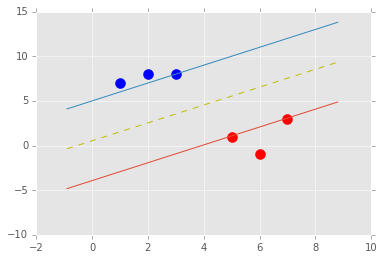

In [7]:
svm = Support_Vector_Machine()
svm.fit(data = data_dict)
svm.visualize()